# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

# Цель проекта:

Определить где бурить новую скважину. 

# Задачи:

1. Построить модель для предсказания объёма запасов в новых скважинах;
2. Выбрать скважины с самыми высокими оценками значений;
3. Определить регион с максимальной суммарной прибылью отобранных скважин.

# Инструкция по выполнению проекта

    Загрузите и подготовьте данные. Поясните порядок действий.
    
Обучите и проверьте модель для каждого региона:

     2.1. Разбейте данные на обучающую и валидационную выборки в соотношении 75:25;
     2.2. Обучите модель и сделайте предсказания на валидационной выборке.
     2.3. Сохраните предсказания и правильные ответы на валидационной выборке.
     2.4. Напечатайте на экране средний запас предсказанного сырья и RMSE модели.
     2.5. Проанализируйте результаты.
 
Подготовьтесь к расчёту прибыли:

    3.1. Все ключевые значения для расчётов сохраните в отдельных переменных.
    3.2. Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе. 
    3.3. Напишите выводы по этапу подготовки расчёта прибыли.
     
Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:

     4.1. Выберите скважины с максимальными значениями предсказаний. 
     4.2. Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.
     4.3. Рассчитайте прибыль для полученного объёма сырья.
     
Посчитайте риски и прибыль для каждого региона:

     5.1. Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
     5.2. Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
     5.3. Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.

# Описание данных

Данные геологоразведки трёх регионов находятся в файлах: 

    /datasets/geo_data_0.csv. Скачать датасет
    /datasets/geo_data_1.csv. Скачать датасет
    /datasets/geo_data_2.csv. Скачать датасет
    
id — уникальный идентификатор скважины;

f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);

product — объём запасов в скважине (тыс. баррелей).

# Условия задачи:

    Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
    
    При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
    Бюджет на разработку скважин в регионе — 10 млрд рублей.
    
    При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
    
    После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

## Загрузка и подготовка данных

In [1]:
# Импортируем необходимые библиотеки и функции

import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats as st

import matplotlib.pyplot as plt
from numpy.random import RandomState
from tqdm.auto import tqdm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
# Загрузим датасеты:

data_zero = pd.read_csv('/datasets/geo_data_0.csv', index_col = 'id')
data_one = pd.read_csv('/datasets/geo_data_1.csv', index_col = 'id')
data_two = pd.read_csv('/datasets/geo_data_2.csv', index_col = 'id')

In [3]:
# Для удобства объединим датасеты

data = [data_zero, data_one, data_two]

In [4]:
# Выведем информацию о датасетах:

for i in range(3):
    print(data[i].info())
    print()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, txEyH to 1CWhH
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.8+ MB
None

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, kBEdx to relB0
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.8+ MB
None

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, fwXo0 to V9kWn
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float

In [5]:
# Проверка дубликатов:

for i in range(3):
    print("Количество дублирующих строк в датасете data", i, ":", data[i].duplicated().sum())

Количество дублирующих строк в датасете data 0 : 0
Количество дублирующих строк в датасете data 1 : 0
Количество дублирующих строк в датасете data 2 : 0


In [6]:
# Проверка пропущенных значения:

for i in range(3):
    print("\nКоличество пропущенных данных в датасете data", i, ":")
    print(data[i].isna().sum())


Количество пропущенных данных в датасете data 0 :
f0         0
f1         0
f2         0
product    0
dtype: int64

Количество пропущенных данных в датасете data 1 :
f0         0
f1         0
f2         0
product    0
dtype: int64

Количество пропущенных данных в датасете data 2 :
f0         0
f1         0
f2         0
product    0
dtype: int64


### Промежуточный вывод по подготовке данных:

    Размер датасетов одинаковый: 100 000 строк х 5 столбцов. 

    Информация в датасетах идентичная:
    
        id — уникальный идентификатор скважины, состоящий из букв и цифр, тип object, как и должно быть.
        f0, f1, f2 — три признака скважин, тип данных - float64, все верно.
        product — объём запасов в скважине (тыс. баррелей), тип данных float64, верно. 
        
    Названия столбцов соответствуют стилю snake_case, пропущенных значений в датасетах нет, дубликатов тоже.
    
    Все признаки в датасетах - численные. Категориальных признаков нет.


## Обучение и проверка модели

In [7]:
# Создадим объект StandardScaler для масшттабирования признаков
scaler = StandardScaler()

In [8]:
SEED = 12345

In [9]:
# функция для выделения признаков и разбиения данных на выборки:
def split_data(data, size=0.25, SEED=12345):
    features = data.drop('product', axis=1)
    target = data['product']
    
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, 
                                                                                  test_size=size, random_state=12345)
    scaler.fit(features_train)
    features_train = pd.DataFrame(scaler.transform(features_train),
                                  index=target_train)
    features_valid = pd.DataFrame(scaler.transform(features_valid),
                                  index=target_valid)
    return features_train, features_valid, target_train, target_valid     

 Разделим данные со всех трех месторождений на выборки в пропорции 3/1. А так же проверим корректность разделения

In [10]:
# Первое месторождение
features_train_geo_0, features_valid_geo_0, target_train_geo_0, target_valid_geo_0 = split_data(data_zero, 0.25, SEED)
print(f'Размер обучающей выборки {features_train_geo_0.shape}')
print(f'Размер тестовой выборки {features_valid_geo_0.shape}')

Размер обучающей выборки (75000, 3)
Размер тестовой выборки (25000, 3)


In [11]:
# Второе месторождение
features_train_geo_1, features_valid_geo_1, target_train_geo_1, target_valid_geo_1 = split_data(data_one, 0.25, SEED)
print(f'Размер обучающей выборки {features_train_geo_1.shape}')
print(f'Размер тестовой выборки {features_valid_geo_1.shape}')

Размер обучающей выборки (75000, 3)
Размер тестовой выборки (25000, 3)


In [12]:
# Третье месторождение
features_train_geo_2, features_valid_geo_2, target_train_geo_2, target_valid_geo_2 = split_data(data_two, 0.25, SEED)
print(f'Размер обучающей выборки {features_train_geo_2.shape}')
print(f'Размер тестовой выборки {features_valid_geo_2.shape}')

Размер обучающей выборки (75000, 3)
Размер тестовой выборки (25000, 3)


In [13]:
# Обучим модель
model = LinearRegression()

Обучим модели на данных каждого месторождения.

In [14]:
# создадим словарь, для удобства
learning_dict = {'mean_true':[], 'mean_pred':[], 'rmse':[]}

In [15]:
# функция для обучения модели и расчета среднего значения предсказаний
def LearnModel(prediction, target, model):
    mean_true = target.mean()
    mean_pred = prediction.mean()
    rmse = mean_squared_error(target, prediction)** 0.5
    return mean_true, mean_pred, rmse

In [16]:
model_0 = model.fit(features_train_geo_0, target_train_geo_0)
prediction_0 = pd.Series(model_0.predict(features_valid_geo_0), index=target_valid_geo_0.index)

mean_true_0, mean_pred_0, rmse_0 = LearnModel(prediction_0, target_valid_geo_0, model_0)
learning_dict['mean_true'].append(mean_true_0)
learning_dict['mean_pred'].append(mean_pred_0)
learning_dict['rmse'].append(rmse_0)

In [17]:
model_1 = model.fit(features_train_geo_1, target_train_geo_1)
prediction_1 = pd.Series(model_1.predict(features_valid_geo_1), index=target_valid_geo_1.index)

mean_true_1, mean_pred_1, rmse_1 = LearnModel(prediction_1, target_valid_geo_1, model_1)
learning_dict['mean_true'].append(mean_true_1)
learning_dict['mean_pred'].append(mean_pred_1)
learning_dict['rmse'].append(rmse_1)

In [18]:
model_2 = model.fit(features_train_geo_2, target_train_geo_2)
prediction_2 = pd.Series(model_2.predict(features_valid_geo_2), index=target_valid_geo_2.index)

mean_true_2, mean_pred_2, rmse_2 = LearnModel(prediction_2, target_valid_geo_2, model_2)
learning_dict['mean_true'].append(mean_true_2)
learning_dict['mean_pred'].append(mean_pred_2)
learning_dict['rmse'].append(rmse_2)

In [19]:
result_data = pd.DataFrame(learning_dict, index=['geo_0', 'geo_1', 'geo_2'])

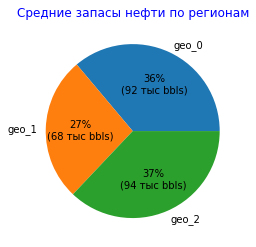

In [20]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.0f}%\n({:d} тыс bbls)".format(pct, absolute)

labels = ['geo_0', 'geo_1', 'geo_2']
mean_pred = [mean_pred_0, mean_pred_1, mean_pred_2]
fig, ax = plt.subplots()
ax.pie(mean_pred, labels=labels, 
       autopct = lambda pct: func(pct, mean_pred),)
ax.set_title("Средние запасы нефти по регионам", color='blue')
plt.show();

### Промежуточные выводы по обучению и проверке модели:

    Данные разделены на обучающую и валидационную выборки в соотношении 75:25;

    Данные масштабированы;

    Созданы и обучены модели LinearRegression;

    Выполнены предсказания на валидационной выборке;

    Сделаны предсказания по объёму сырья в скважинах;

    В таблице ниже представлены истинные средние  значения, средние значения предсказаний и среднеквадратические ошибки:



In [21]:
result_data

,mean_true,mean_pred,rmse
geo_0,92.078597,92.592568,37.579422
geo_1,68.723136,68.728547,0.893099
geo_2,94.884233,94.965046,40.029709


       Первое и третье месторождения имеют средние значения близкие друг к другу, второе месторождение имеет достаточно низкое среднее значение. Среднеквадратические ошибки на первом и третьем месторождении составляют около 38 (тысяч баррелей), а вот на втором местородждении ошибка всего 0.9 (тысяч баррелей). Модели обучались в равных условия, поэтому такие различия могут быть связаны с переобучением модели.

## Подготовка к расчёту прибыли

In [22]:
# Условия задачи

BUDGET = 10 ** 10   # Бюджет на разработку скважин
BEST_POINTS = 500  # Количесвто точек, исследуемых при разведке
POINTS = 200  # Количесвто лучших точек, выбранных для разработки
PRISE = 450000  # Цена 1000 баррелей нефти

 Для расчёта прибыли необходимо рассчитать, какой объем месторождения является минимальным для начала разработки:

In [23]:
min_product = BUDGET / (PRISE * POINTS)
min_product

111.11111111111111

    Чтобы месторождение окупило себестоимоть разработки, необходимо, чтобы в среднем в скважинах было больше 111.1 тысяч баррелей нефти. Средние объемы в скважинах всех месторождений ниже этой отметки. Это говорит о том, что необходимо выбрать наиболее выгодные точки в каждом месторождении и уже их сравнивать между собой. 
    
    Нужно выбрать самое прибильное месторождение исходя из условий, установленных возможностями компании. 
    
    Для этого поготовим функцию расчета прибылли:

In [24]:
def revenue(target, probabilities, count, prise):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return prise * selected.sum() - BUDGET


## Расчёт прибыли и рисков 

In [25]:
state = np.random.RandomState(SEED)

In [26]:
# средняя прибыль для 1000 различных вариантов разведки:
def BootStrap(target, valid, count, state):
    values = []
    for i in range(1000):
        target_subsample = target.sample(n=count, replace=True, random_state=state)
        probs_subsample = valid[target_subsample.index]
        a = revenue(target_subsample, probs_subsample, POINTS, PRISE)
        values.append(a)
        
    values = pd.Series(values)
    return values

In [27]:
# первое месторождение
values_0 = BootStrap(target_valid_geo_0, prediction_0, BEST_POINTS, state)

mean_0 = values_0.mean()
lower_0 = values_0.quantile(0.025)
upper_0 = values_0.quantile(0.975)
risk_0 = values_0[values_0 < 0].count() / values_0.count() * 100

print("Средняя выручка:", mean_0)
print("доверительный интервал (95%):", [lower_0, upper_0])
print("Риск получения убытков:", risk_0)

Средняя выручка: 425938526.91059244
доверительный интервал (95%): [-102090094.83793654, 947976353.3583689]
Риск получения убытков: 6.0


In [28]:
# второе месторождение
values_1 = BootStrap(target_valid_geo_1, prediction_1, BEST_POINTS, state)

mean_1 = values_1.mean()
lower_1 = values_1.quantile(0.025)
upper_1 = values_1.quantile(0.975)
risk_1 = values_1[values_1 < 0].count() / values_1.count() * 100

print("Средняя выручка:", mean_1)
print("доверительный интервал (95%):", [lower_1, upper_1])
print("Риск получения убытков:", risk_1)

Средняя выручка: 518259493.6973249
доверительный интервал (95%): [128123231.43308444, 953612982.0669085]
Риск получения убытков: 0.3


In [29]:
# третье месторождение
values_2 = BootStrap(target_valid_geo_2, prediction_2, BEST_POINTS, state)

mean_2 = values_2.mean()
lower_2 = values_2.quantile(0.025)
upper_2 = values_2.quantile(0.975)
risk_2 = values_2[values_2 < 0].count() / values_2.count() * 100

print("Средняя выручка:", mean_2)
print("доверительный интервал (95%):", [lower_2, upper_2])
print(f'Риск получения убытков: {risk_2}%')

Средняя выручка: 420194005.3440501
доверительный интервал (95%): [-115852609.16001143, 989629939.8445739]
Риск получения убытков: 6.2%


In [30]:
final_dict = {'Минимальная выручка':[lower_0, lower_1, lower_2], 
              'Средняя выручка':[mean_0, mean_1, mean_2],
              'Максимальна выручка':[upper_0, upper_1, upper_2],
              'Риск убытков, %' : [risk_0, risk_1, risk_2]}
index_data = ['Первое месторождение', 'Второе месторождение', 'Третье месторождение']
final_data = pd.DataFrame(data=final_dict, index=index_data)

In [31]:
 final_data

,Минимальная выручка,Средняя выручка,Максимальна выручка,"Риск убытков, %"
Первое месторождение,-1.020901e+08,4.259385e+08,9.479764e+08,6.0
Второе месторождение,1.281232e+08,5.182595e+08,9.536130e+08,0.3
Третье месторождение,-1.158526e+08,4.201940e+08,9.896299e+08,6.2


/tmp/ipykernel_123/1147850083.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(X, fontsize=12, color='blue')


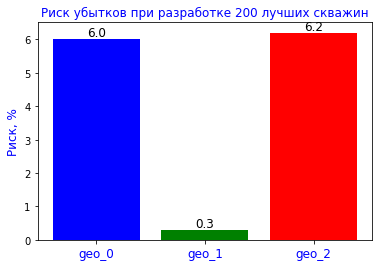

In [32]:
# Строим гистограмму со значениями рисков.
X = ['geo_0', 'geo_1', 'geo_2']
Y = [risk_0, risk_1, risk_2]
c = ['blue', 'green', 'red']
plt.bar(X, Y, color=c)
for i in range(3):
    plt.text(X[i], Y[i], float(Y[i]), 
             horizontalalignment='center', verticalalignment='bottom', 
             fontdict={'fontweight':500, 'size':12})
plt.title("Риск убытков при разработке 200 лучших скважин", fontsize=12, color='blue')
plt.ylabel('Риск, %', fontsize=12, color='blue')
plt.gca().set_xticklabels(X, fontsize=12, color='blue')
plt.show()

    Только во втором регионе (geo_2) вероятность убытков меньше 2.5%, средняя прибыль которого составляет около 518 млн рублей.
    
    Для региона 2 95%-й доверительный интервал не содержит отрицательных значений.
    
    Интересно, что несмотря на сравнительно меньшие запасы сырья, по сравнению с другими регионами (всего 68 тыс баррелей против 92 и 94 для других регионов.), средняя доходность со скважин во этом регионе прогнозируется выше других при наименьших рисках.

## Общий вывод:
    В ходе исследования были изучены данные по трем регионам, состоящих из 100 000 месторождений, по которым имеются данные  по качеству и объему запасов.
    
    Рассчитаны минимальные средние объемы в скважинах всех месторождений для окупаемости разработки  - 111,1 тыс.баррелей и предсказанный средний запас:

In [33]:
result_data

,mean_true,mean_pred,rmse
geo_0,92.078597,92.592568,37.579422
geo_1,68.723136,68.728547,0.893099
geo_2,94.884233,94.965046,40.029709


    Средний запас ресурсов по регионам оказался недостаточным для окупаемости вложений на разработку.
    
    Принимается решение о том, что разработку сразу всех скважин вести нерентабельно.
    
    Из всех скважин нужно выбрать всего 200 лучших с максимальными запасами и инвестировать в их запуск и производственную деятельность.

    Выполнены предсказания при помощи линейной регрессии, а так же применена технологиа Bootstrap с разделением каждого предсказанного значения прибыли по регионам на 1000 выборок.На этих данных обучены модели для предсказания среднего запаса сырья в новых скважинах:

In [34]:
 final_data

,Минимальная выручка,Средняя выручка,Максимальна выручка,"Риск убытков, %"
Первое месторождение,-1.020901e+08,4.259385e+08,9.479764e+08,6.0
Второе месторождение,1.281232e+08,5.182595e+08,9.536130e+08,0.3
Третье месторождение,-1.158526e+08,4.201940e+08,9.896299e+08,6.2


    Определен доверительный интервал получения прибыли в 95%.

    Несмотря на сравнительно меньшие запасы сырья, по сравнению с другими регионами (всего 68 тыс баррелей против 92 и 94), средняя доходность с 200 лучших скважин во регионе 2 прогнозируется выше других, при наименьших рисках.

    Наименьший риск получения убытков при разработке 200 скважин определен для второго региона.

    При величине запасов на уровне 68 (тыс. баррелей), по показателю наименьшего риска (<2.5%) c прибыльностью ~ 520 (млн. руб.) выбирается модель разработки 200 скважин в регионе №2 (файл с исходными данными: 'geo_data_1.csv').